<a href="https://colab.research.google.com/github/Raspberry765/deep-metric-learning/blob/main/SubCenterArcFaceMNIST_LoF_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmaxによる分類

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/deep_metric_learning/archive.zip" .
!unzip archive.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: mnist_png/valid/4/8664.png  
  inflating: mnist_png/valid/4/8675.png  
  inflating: mnist_png/valid/4/8685.png  
  inflating: mnist_png/valid/4/8695.png  
  inflating: mnist_png/valid/4/8709.png  
  inflating: mnist_png/valid/4/8743.png  
  inflating: mnist_png/valid/4/8754.png  
  inflating: mnist_png/valid/4/8755.png  
  inflating: mnist_png/valid/4/8757.png  
  inflating: mnist_png/valid/4/8770.png  
  inflating: mnist_png/valid/4/8773.png  
  inflating: mnist_png/valid/4/8775.png  
  inflating: mnist_png/valid/4/8790.png  
  inflating: mnist_png/valid/4/8797.png  
  inflating: mnist_png/valid/4/8802.png  
  inflating: mnist_png/valid/4/881.png  
  inflating: mnist_png/valid/4/8812.png  
  inflating: mnist_png/valid/4/8822.png  
  inflating: mnist_png/valid/4/8829.png  
  inflating: mnist_png/valid/4/8832.png  
  inflating: mnist_png/valid/4/8836.png  
  inflating: mnist_png/valid/4/8861.png  
  inflating: mnist_png/valid/4/8879.png  
  i

In [23]:
!mkdir "/content/mnist_png/train_resized/"
!mkdir "/content/mnist_png/valid_resized/"

!mkdir "/content/mnist_png/train_resized/0"
!mkdir "/content/mnist_png/train_resized/1"
!mkdir "/content/mnist_png/train_resized/2"
!mkdir "/content/mnist_png/train_resized/3"
!mkdir "/content/mnist_png/train_resized/4"
!mkdir "/content/mnist_png/train_resized/5"
!mkdir "/content/mnist_png/train_resized/6"
!mkdir "/content/mnist_png/train_resized/7"
!mkdir "/content/mnist_png/train_resized/8"
!mkdir "/content/mnist_png/train_resized/9"


mkdir: cannot create directory ‘/content/mnist_png/train_resized/’: File exists
mkdir: cannot create directory ‘/content/mnist_png/valid_resized/’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/0’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/1’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/2’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/3’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/4’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/5’: File exists
mkdir: cannot create directory ‘/content/mnist_png/train_resized/6’: File exists


In [8]:
from PIL import Image
im = Image.open("/content/mnist_png/train/0/1.png")
im.show()
print(im.size)

(28, 28)


# 画像の余白を黒で埋める関数

In [9]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

# オリジナルのMNISTデータを288x288にリサイズするプログラム

In [36]:
#original_dir = "/content/mnist_png/train/" + str(train_index_list[0]) +"/*"
#print(original_dir)

train_index_list = list( range(0,10) )
for train_index in train_index_list:
  original_dir = "/content/mnist_png/train/" + str(train_index_list[0]) +"/*"
  files = glob.glob(original_dir)
  for file in files:
      #print(file)
      list_name=file.split("/")
      #print(list_name[-1])
      im = Image.open(str(file))
      im_new = add_margin(im, 130, 130, 130, 130, (0))
      save_dir = "/content/mnist_png/train_resized/" + str(train_index)+ "/" +list_name[-1]
      print(save_dir)
      im_new.save(save_dir, quality=95)



ストリーミング出力は最後の 5000 行に切り捨てられました。
/content/mnist_png/train_resized/9/3369.png
/content/mnist_png/train_resized/9/30246.png
/content/mnist_png/train_resized/9/9695.png
/content/mnist_png/train_resized/9/15017.png
/content/mnist_png/train_resized/9/36564.png
/content/mnist_png/train_resized/9/16905.png
/content/mnist_png/train_resized/9/6394.png
/content/mnist_png/train_resized/9/51992.png
/content/mnist_png/train_resized/9/19872.png
/content/mnist_png/train_resized/9/11887.png
/content/mnist_png/train_resized/9/18921.png
/content/mnist_png/train_resized/9/37153.png
/content/mnist_png/train_resized/9/35294.png
/content/mnist_png/train_resized/9/47812.png
/content/mnist_png/train_resized/9/10254.png
/content/mnist_png/train_resized/9/46772.png
/content/mnist_png/train_resized/9/20936.png
/content/mnist_png/train_resized/9/11409.png
/content/mnist_png/train_resized/9/33864.png
/content/mnist_png/train_resized/9/16868.png
/content/mnist_png/train_resized/9/52245.png
/content/mnist_png/train_r

In [37]:
!ls "./mnist_png/train_resized/1"

10005.png  17828.png  25701.png  33578.png  41288.png  48963.png  56469.png
1000.png   17838.png  25707.png  33608.png  41291.png  489.png	  5646.png
10010.png  17871.png  25714.png  33640.png  41296.png  49011.png  56489.png
10022.png  17877.png  25725.png  33641.png  41315.png  49013.png  56509.png
10025.png  17881.png  25729.png  33645.png  41318.png  49014.png  56512.png
10026.png  17905.png  25743.png  33647.png  41320.png  49027.png  56522.png
10045.png  17923.png  25750.png  33657.png  41331.png  49059.png  56530.png
10069.png  17930.png  25754.png  33661.png  41338.png  49065.png  56533.png
10071.png  17932.png  25755.png  33665.png  41341.png  4906.png   56556.png
10080.png  17941.png  25757.png  33669.png  41350.png  49075.png  56570.png
10083.png  17956.png  25773.png  33670.png  41352.png  49085.png  56573.png
10107.png  17968.png  25783.png  33673.png  41353.png  49086.png  56606.png
10119.png  1796.png   25803.png  33677.png  41357.png  49097.png  56608.png
10120.png  179

ストリーミング出力は最後の 5000 行に切り捨てられました。
/content/mnist_png/train/0/54597.png
54597.png
/content/mnist_png/train/0/43418.png
43418.png
/content/mnist_png/train/0/51108.png
51108.png
/content/mnist_png/train/0/43468.png
43468.png
/content/mnist_png/train/0/37506.png
37506.png
/content/mnist_png/train/0/54475.png
54475.png
/content/mnist_png/train/0/51789.png
51789.png
/content/mnist_png/train/0/47197.png
47197.png
/content/mnist_png/train/0/1596.png
1596.png
/content/mnist_png/train/0/33933.png
33933.png
/content/mnist_png/train/0/33136.png
33136.png
/content/mnist_png/train/0/19166.png
19166.png
/content/mnist_png/train/0/27512.png
27512.png
/content/mnist_png/train/0/43265.png
43265.png
/content/mnist_png/train/0/9914.png
9914.png
/content/mnist_png/train/0/41358.png
41358.png
/content/mnist_png/train/0/9922.png
9922.png
/content/mnist_png/train/0/42612.png
42612.png
/content/mnist_png/train/0/57700.png
57700.png
/content/mnist_png/train/0/31059.png
31059.png
/content/mnist_png/train/0/47860.p

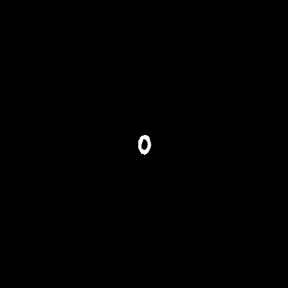

im_new.size: (288, 288)


In [14]:
import glob


files = glob.glob("/content/mnist_png/train/0/*")
for file in files:
    print(file)
    list_name=file.split("/")
    print(list_name[-1])
    im = Image.open(str(file))
    im_new = add_margin(im, 130, 130, 130, 130, (0))
    im_new.save('/content/mnist_png/train_resized/0/'+list_name[-1], quality=95)


# im_new = add_margin(im, 130, 130, 130, 130, (0))
# im_new.show()
# print("im_new.size:",im_new.size)
# im_new.save('/content/mnist_png/train_resized/0/1.png', quality=95)

In [ ]:
!pip install pytorch-metric-learning
!pip install faiss-gpu
!pip install torchsummary
!pip install plotly==5.14.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision

from pytorch_metric_learning import losses, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from torchsummary import summary
import plotly.express as px
import plotly.graph_objects as go
from torch.utils.data.dataset import Subset
from torchvision.models.feature_extraction import create_feature_extractor

In [ ]:
### MNIST code originally from https://github.com/pytorch/examples/blob/master/mnist/main.py ###
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ##torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1)
        self.conv1 = nn.Conv2d(1, 32, 3, 1) #MNISTのデータはグレースケールだから、channel数は1である
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.25)
        self.dropout3 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(15488, 256)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        ##torch.nn.functional.max_pool2d(input, kernel_size, stride=kernel_size)
        #max_pool2dのstrideのデフォルトはkernel_size
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x


### MNIST code originally from https://github.com/pytorch/examples/blob/master/mnist/main.py ###
def train(model, loss_func, device, train_loader, optimizer, loss_optimizer, epoch):
    model.train()
    loss_list = []
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        loss_optimizer.zero_grad()
        embeddings = model(data)
        #loss_func = losses.SubCenterArcFaceLoss(num_classes=10, embedding_size=256).to(device) #0~9の数字を分類するため　10classに分類する、embedding_sizeは最終出力のunits数
        loss = loss_func(embeddings, labels)
        loss.backward()
        optimizer.step()
        loss_optimizer.step()
        if batch_idx % 100 == 0:
            print("Epoch {} Iteration {}: Loss = {}".format(epoch, batch_idx, loss))
            numpy_loss = loss.cpu().detach().numpy()
            loss_list.append(numpy_loss)
            #print(numpy_loss)            
    return loss_list


### convenient function from pytorch-metric-learning ###
def get_all_embeddings(dataset, model):
    tester = testers.BaseTester()
    return tester.get_all_embeddings(dataset, model)


### compute accuracy using AccuracyCalculator from pytorch-metric-learning ###
def test(train_set, test_set, model, accuracy_calculator):
    train_embeddings, train_labels = get_all_embeddings(train_set, model)
    test_embeddings, test_labels = get_all_embeddings(test_set, model)
    train_labels = train_labels.squeeze(1)
    test_labels = test_labels.squeeze(1)
    print("Computing accuracy")
    accuracies = accuracy_calculator.get_accuracy(
        test_embeddings, test_labels, train_embeddings, train_labels, False
    )
    print("Test set accuracy (Precision@1) = {}".format(accuracies["precision_at_1"]))




## View some sample outliers

In [ ]:


img_mean, img_std = (0.1307,), (0.3081,) #MNISTの平均と標準偏差  https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457 


inv_normalize = transforms.Normalize(
    mean=[-m / s for m, s in zip(img_mean, img_std)], std=[1 / s for s in img_std]
)


def imshow(img, figsize=(8, 4)):
    img = inv_normalize(img)
    npimg = img.numpy()
    plt.figure(figsize=figsize)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def imshow_many(dataset, outliers, n=32):
    imgs = [
        dataset[outliers[i]][0]
        for i in np.random.choice(
            len(outliers), size=min(n, len(outliers)), replace=False
        )
    ]
    imshow(torchvision.utils.make_grid(imgs))

In [ ]:

device = torch.device("cuda")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(img_mean, img_std)]
) #MNISTの平均と標準偏差を画像に対して前処理を行うためのパラメーター



dataset1 = datasets.MNIST("./sample_data/", train=True, download=True, transform=transform) #トランスフォームを適用して、ダウンロード
dataset2 = datasets.MNIST("./sample_data/", train=False, transform=transform) #トランスフォームを適用して、ダウンロード



In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset1, batch_size=batch_size, shuffle=True
)

model = Net().to("cuda")

test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size) #batch sizeは2**n deep learning C2 w2 optimization algorithms
optimizer = optim.Adam(model.parameters(), lr=0.01)#defalut lr=0.01 #ハイパーパラメーター
num_epochs = 2


### pytorch-metric-learning stuff ###
loss_func = losses.SubCenterArcFaceLoss(num_classes=10, embedding_size=256).to(device) #0~9の数字を分類するため　10classに分類する、embedding_sizeは最終出力のunits数
loss_optimizer = torch.optim.Adam(loss_func.parameters(), lr=1e-4)#ハイパーパラメーター
accuracy_calculator = AccuracyCalculator(include=("precision_at_1",), k=1)
### pytorch-metric-learning stuff ###

# train、validation、test datasetの作成
[train set validation testset役割](https://algorithm.joho.info/programming/python/keras-train-validation-test-dataset/)
[リンクテキスト](https://www.youtube.com/watch?v=swCf51Z8QDo)

In [ ]:

#print(device)
n_samples = int( len(dataset1) )  # n_samples is 60000
train_size = int( n_samples * 0.8 ) # train_size is 48000
val_size = n_samples - train_size

# shuffleしてから分割してくれる.
train_dataset, val_dataset = torch.utils.data.random_split(dataset1, [train_size, val_size])

print(len(train_dataset)) # 48000
print(len(val_dataset)) # 12000

#print(torch.cuda.is_available())

48000
12000


# Modelの表示

In [ ]:
print(model)
summary(model,(1,28,28))

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.25, inplace=False)
  (dropout3): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=15488, out_features=256, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 22, 22]          73,856
         Dropout2d-4          [-1, 128, 11, 11]               0
            Linear-5                  [-1, 256]       3,965,184
Total params: 4,057,856
Trainable params: 4,057,856
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB):

## Train the model

In [ ]:
sum_loss_list = []
for epoch in range(1, num_epochs + 1):
    loss_list = train(model, loss_func, device, train_loader, optimizer, loss_optimizer, epoch)
    print(loss_list)
    sum_loss_list.extend(loss_list)
    test(dataset1, dataset2, model, accuracy_calculator)
print(sum_loss_list)

Epoch 1 Iteration 0: Loss = 35.764312744140625
Epoch 1 Iteration 100: Loss = 7.76138973236084
Epoch 1 Iteration 200: Loss = 4.447141647338867
Epoch 1 Iteration 300: Loss = 5.0676398277282715
Epoch 1 Iteration 400: Loss = 2.505422592163086
Epoch 1 Iteration 500: Loss = 2.0397205352783203
Epoch 1 Iteration 600: Loss = 4.966072082519531
Epoch 1 Iteration 700: Loss = 4.030427932739258
Epoch 1 Iteration 800: Loss = 3.352116584777832
Epoch 1 Iteration 900: Loss = 2.436189651489258
[array(35.764313, dtype=float32), array(7.7613897, dtype=float32), array(4.4471416, dtype=float32), array(5.06764, dtype=float32), array(2.5054226, dtype=float32), array(2.0397205, dtype=float32), array(4.966072, dtype=float32), array(4.030428, dtype=float32), array(3.3521166, dtype=float32), array(2.4361897, dtype=float32)]


100%|██████████| 313/313 [00:04<00:00, 65.27it/s]


Computing accuracy


/usr/local/lib/python3.9/dist-packages/faiss/contrib/torch_utils.py:51: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x.storage().data_ptr() + x.storage_offset() * 4)
/usr/local/lib/python3.9/dist-packages/faiss/contrib/torch_utils.py:65: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x.storage().data_ptr() + x.storage_offset() * 8)


Test set accuracy (Precision@1) = 0.9839
Epoch 2 Iteration 0: Loss = 2.275808334350586
Epoch 2 Iteration 100: Loss = 2.810114622116089
Epoch 2 Iteration 200: Loss = 2.0490059852600098
Epoch 2 Iteration 300: Loss = 3.127804756164551
Epoch 2 Iteration 400: Loss = 2.3135244846343994
Epoch 2 Iteration 500: Loss = 0.7286263704299927
Epoch 2 Iteration 600: Loss = 2.035649538040161
Epoch 2 Iteration 700: Loss = 0.5141208171844482
Epoch 2 Iteration 800: Loss = 2.3787686824798584
Epoch 2 Iteration 900: Loss = 2.098139762878418
[array(2.2758083, dtype=float32), array(2.8101146, dtype=float32), array(2.049006, dtype=float32), array(3.1278048, dtype=float32), array(2.3135245, dtype=float32), array(0.7286264, dtype=float32), array(2.0356495, dtype=float32), array(0.5141208, dtype=float32), array(2.3787687, dtype=float32), array(2.0981398, dtype=float32)]


100%|██████████| 313/313 [00:03<00:00, 80.87it/s] 


Computing accuracy
Test set accuracy (Precision@1) = 0.9872000000000001
[array(35.764313, dtype=float32), array(7.7613897, dtype=float32), array(4.4471416, dtype=float32), array(5.06764, dtype=float32), array(2.5054226, dtype=float32), array(2.0397205, dtype=float32), array(4.966072, dtype=float32), array(4.030428, dtype=float32), array(3.3521166, dtype=float32), array(2.4361897, dtype=float32), array(2.2758083, dtype=float32), array(2.8101146, dtype=float32), array(2.049006, dtype=float32), array(3.1278048, dtype=float32), array(2.3135245, dtype=float32), array(0.7286264, dtype=float32), array(2.0356495, dtype=float32), array(0.5141208, dtype=float32), array(2.3787687, dtype=float32), array(2.0981398, dtype=float32)]


# lossをプロットする

20


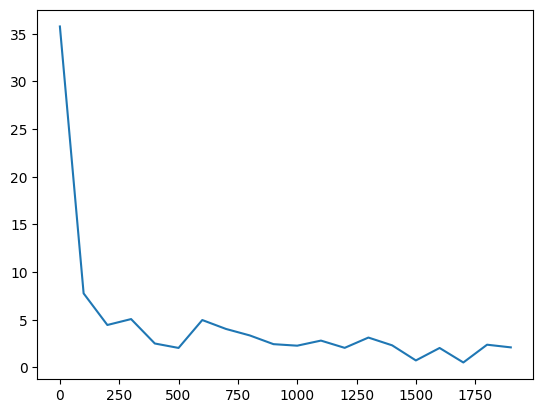

In [ ]:
#print(type(loss_list[0]))
print(len(sum_loss_list))
x = np.arange(len(sum_loss_list))*100 #-5から5まで0.1区切りで配列を作る
y = sum_loss_list #配列xの値に関してそれぞれsin(x)を求めてy軸の配列を生成

plt.plot(x,y) # この場合のplot関数の第一引数xは、x軸に対応し、第二引数のyがy軸にあたります。
plt.show()

In [ ]:
x = np.arange(len(sum_loss_list))*100 #-5から5まで0.1区切りで配列を作る
y = sum_loss_list #配列xの値に関してそれぞれsin(x)を求めてy軸の配列を生成

fig = go.Figure()
fig.add_trace(
go.Scatter(x=x,y=y)
)
fig.update_layout(
    xaxis_title = 'Number of Epoch',
    yaxis_title = 'Loss'
)
fig.show()

# modelを保存

In [ ]:
torch.save(model, 'model_dml.pth')

#modelデータのロードをする
# trainデータを埋め込みする



In [ ]:
load_model = torch.load('model_dml.pth')
train_embeddings, train_labels = get_all_embeddings(dataset1, load_model)

100%|██████████| 1875/1875 [00:20<00:00, 89.65it/s] 


## Get outliers(MNISTの文字データのtrainデータを異常検知している)

There are 95 outliers


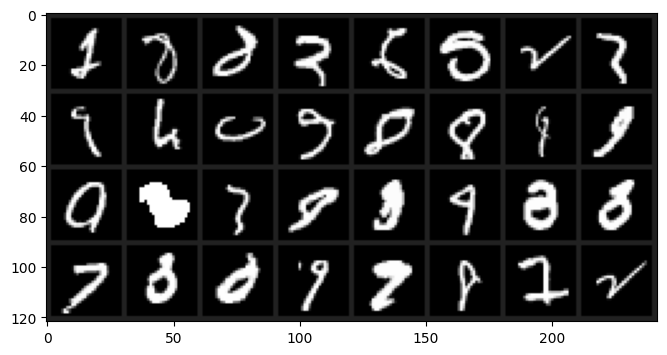

In [ ]:
#get_outliers( embeddings, labels, threshold=75, return_dominant_centers=True)
outliers, _ = loss_func.get_outliers(train_embeddings, train_labels.squeeze(1)) #train modelを異常検知している #lr=0.01 outlier=98
print(f"There are {len(outliers)} outliers")
imshow_many(dataset1, outliers)

In [ ]:
# let's see what outliers are.
# these are the samples that >threshold degrees aways from their dominant centers


# testデータを埋め込みする

In [ ]:
test_embeddings, test_labels = get_all_embeddings(dataset2, model)

100%|██████████| 313/313 [00:04<00:00, 65.23it/s]


## Get outliers(MNISTの文字データのtestデータを異常検知している)

There are 18 outliers(MNIST 10000 test items)


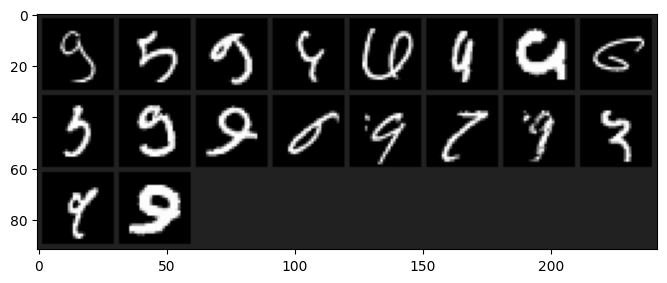

In [ ]:
outliers, _ = loss_func.get_outliers(test_embeddings, test_labels.squeeze(1)) #train modelを異常検知している #lr=0.01 outlier=98
print(f"There are {len(outliers)} outliers(MNIST 10000 test items)")
# let's see what outliers are.
# these are the samples that >threshold degrees aways from their dominant centers
imshow_many(dataset2, outliers)

In [ ]:
# transform to normalize the data
fashion_transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
fashion_trainset = datasets.FashionMNIST('.', download=True, train=True, transform=fashion_transform )
fashion_testset = datasets.FashionMNIST('.', download=True, train=False, transform=fashion_transform )

100%|██████████| 26421880/26421880 [00:00<00:00, 114914895.37it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5378410.85it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 64340985.07it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6024630.86it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



# train fashionデータとtest fashionデータを埋め込みする

Mounted at /content/drive


In [ ]:
train_fashion_embeddings, train_fashion_labels = get_all_embeddings(fashion_trainset, model)
test_fashion_embeddings, test_fashion_labels = get_all_embeddings(fashion_testset, model)

100%|██████████| 313/313 [00:03<00:00, 85.52it/s] 


In [ ]:
outliers, _ = loss_func.get_outliers(train_fashion_embeddings, train_fashion_labels.squeeze(1)) #train modelを異常検知している #lr=0.01 outlier=98
print(f"There are {len(outliers)} outliers(train_fashion 60000 items)")
outliers, _ = loss_func.get_outliers(test_fashion_embeddings, test_fashion_labels.squeeze(1)) #train modelを異常検知している #lr=0.01 outlier=98
print(f"There are {len(outliers)} outliers(train_fashion 10000 items)")

There are 44997 outliers(train_fashion 60000 items)
There are 7509 outliers(train_fashion 10000 items)


64層まで
There are 43690 outliers(train_fashion 60000 items)
There are 7319 outliers(train_fashion 10000 items)

# 中間層の抽出

In [ ]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
def store_feature(module, input, output):
    global feature
    feature = output


load_model.dropout3.register_forward_hook(store_feature)


# x = torch.rand((1, 1, 28, 28)).float()
# y = load_model(x).to(device)
# print(y.shape)
import torch.multiprocessing as multiprocessing
if multiprocessing.get_start_method() == 'fork':
  multiprocessing.set_start_method('spawn', force=True)
  test_embeddings, test_labels = get_all_embeddings(dataset2, load_model)

100%|██████████| 313/313 [00:10<00:00, 29.28it/s]
